# PERGUNTAS : 
  
    Existe mais probabilidade de ter algum problema de coração de acordo com o sexo da pessoa?

    Qual a relação do número de problemas cardiácos com o passar das décadas?
    
    Uma pessoa com glicemia maior que 120mg/dl (pessoas pré-diabéticas e diabéticas) tem mais chance de ter problema no coração?

    De acorco com o pico de exercício, a pessoa tem menos chance de desenvolver problemas cardiovasculares? Se desenvolver, está mais propenso a ser defeito fixo ou reversível?

    De acordo com o colesterol, qual a qualidade do hábito alimentar da pessoa? 

_____________________________________________________________________________________________________________________________________

# importe das bibliotecas

In [581]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## leitura do DataFreme

In [582]:
bd = pd.read_csv('heart (1).csv')

In [583]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [584]:
bd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Existe mais probabilidade de ter algum problema de coração de acordo com a idade/sexo da pessoa?

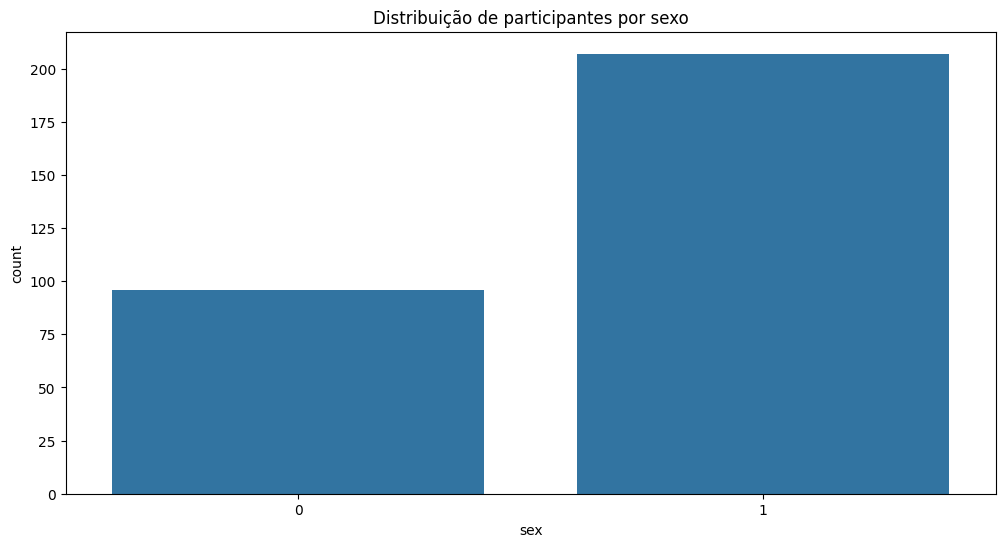

In [585]:
plt.figure(figsize=(12, 6))
plt.title('Distribuição de participantes por sexo')
sns.countplot(data=bd, x='sex');

In [586]:
mulher = bd[bd['sex'] == 0].shape[0]
print(f'Tem {mulher} mulheres na base de dados')

Tem 96 mulheres na base de dados


In [587]:
homem = bd[bd['sex'] == 1].shape[0]
print(f'Tem {homem} homens na base de dados')

Tem 207 homens na base de dados


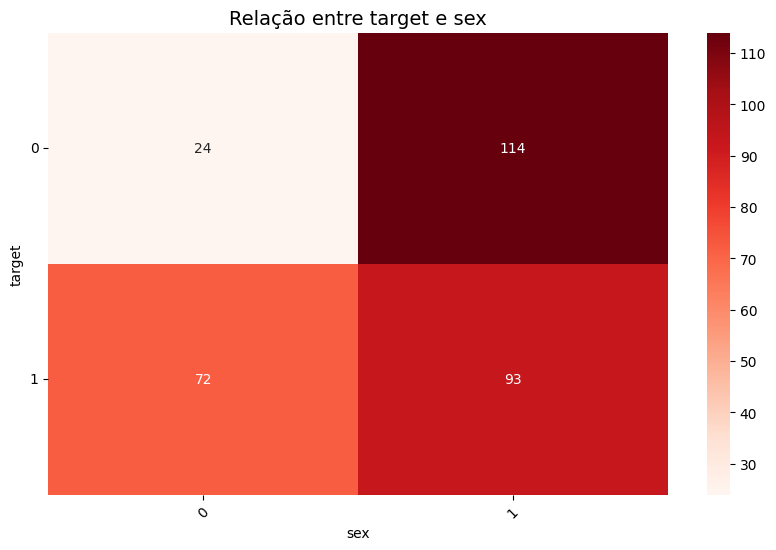

In [588]:
cross_tab = pd.crosstab(bd['target'], bd['sex'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Reds', fmt='d')

plt.title('Relação entre target e sex', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

        mulhes com problemas = 69,12%

        homem com problemas = 44,93%

### Não conseguimos achar o porquê

In [589]:
bd.loc[(bd['ca'] > 0) & (bd['target'] == 0)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [590]:
bd.loc[(bd['chol'] < 200) & (bd['sex'] == 0) & (bd['ca'] == 0)].shape[0]

11

In [591]:
bd.loc[(bd['chol'] < 200) & (bd['sex'] == 0) & (bd['ca'] > 0)].shape[0]

3

In [592]:
PS = bd.loc[(bd['target'] == 0)]

In [593]:
PD = bd.loc[(bd['target'] == 1)]

In [594]:
PS.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [595]:
PD.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


## Qual a relação do número de problemas cardiácos com o passar das décadas?

### Aumento do consumo de alimentos processados: A partir da década de 1970

#### Pessoas nascidas entre 1970 até 1990 tem mais problemas cardiovasculares

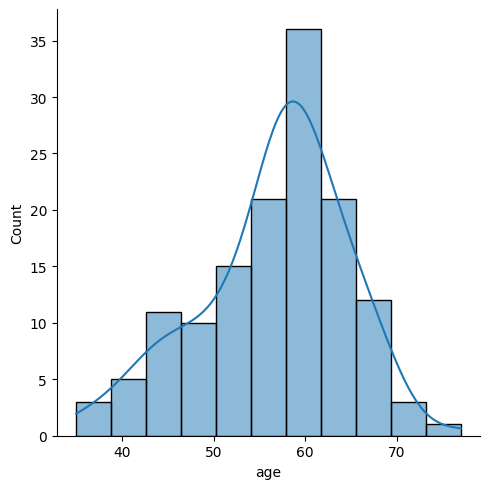

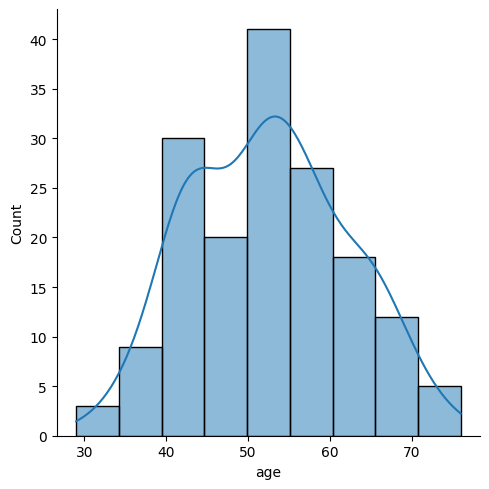

In [596]:
sns.displot(PS['age'], kde = True)
sns.displot(PD['age'], kde = True)

In [597]:
MD = bd.loc[(bd['sex'] == 0) & (bd['target'] == 1)]

In [598]:
MD.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,72.000000,72.0,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.0
mean,54.555556,0.0,1.333333,128.736111,256.750000,0.083333,0.583333,154.027778,0.111111,0.554167,1.583333,0.305556,2.000000,1.0
std,10.265337,0.0,0.919277,16.536765,66.216195,0.278325,0.524069,19.252929,0.316475,0.647843,0.550288,0.596678,0.290701,0.0
min,34.000000,0.0,0.000000,94.000000,141.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,46.000000,0.0,0.750000,119.500000,210.750000,0.000000,0.000000,146.750000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,54.000000,0.0,2.000000,130.000000,249.000000,0.000000,1.000000,159.000000,0.000000,0.250000,2.000000,0.000000,2.000000,1.0
75%,63.250000,0.0,2.000000,140.000000,289.500000,0.000000,1.000000,167.250000,0.000000,1.025000,2.000000,0.000000,2.000000,1.0
max,76.000000,0.0,3.000000,180.000000,564.000000,1.000000,2.000000,192.000000,1.000000,2.600000,2.000000,2.000000,3.000000,1.0


In [599]:
MS = bd.loc[(bd['sex'] == 0) & (bd['target'] == 0)]

In [600]:
MS.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,24.000000,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0
mean,59.041667,0.0,0.166667,146.125000,274.958333,0.250000,0.541667,142.416667,0.583333,1.841667,0.958333,1.291667,2.500000,0.0
std,4.964913,0.0,0.481543,21.436078,60.863696,0.442326,0.658005,20.256865,0.503610,1.608379,0.464306,1.160179,0.589768,0.0
min,43.000000,0.0,0.000000,108.000000,164.000000,0.000000,0.000000,97.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,56.750000,0.0,0.000000,130.000000,234.000000,0.000000,0.000000,132.250000,0.000000,0.800000,1.000000,0.000000,2.000000,0.0
50%,60.500000,0.0,0.000000,140.000000,265.500000,0.000000,0.000000,145.500000,1.000000,1.600000,1.000000,1.500000,3.000000,0.0
75%,62.000000,0.0,0.000000,152.500000,310.000000,0.250000,1.000000,154.750000,1.000000,2.850000,1.000000,2.000000,3.000000,0.0
max,66.000000,0.0,2.000000,200.000000,409.000000,1.000000,2.000000,174.000000,1.000000,6.200000,2.000000,3.000000,3.000000,0.0


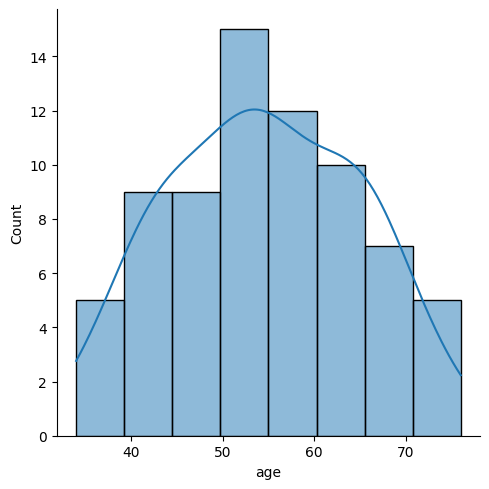

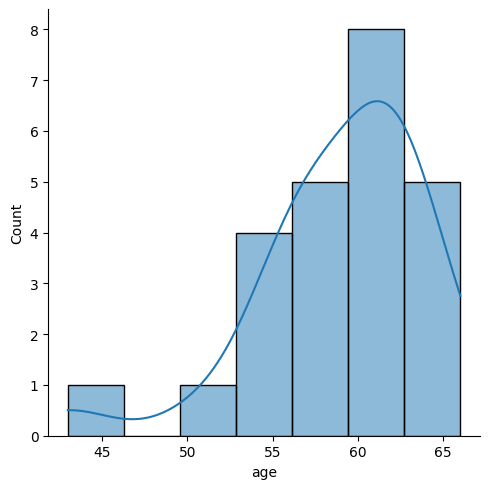

In [601]:
sns.displot(MD['age'], kde = True)
sns.displot(MS['age'], kde = True)

In [602]:
MD['age'].median()

54.0

In [603]:
MS['age'].median()

60.5

### Uma pessoa com glicemia maior que 120mg/dl (pessoas pré-diabéticas e diabéticas) tem mais chance de ter problema no coração?

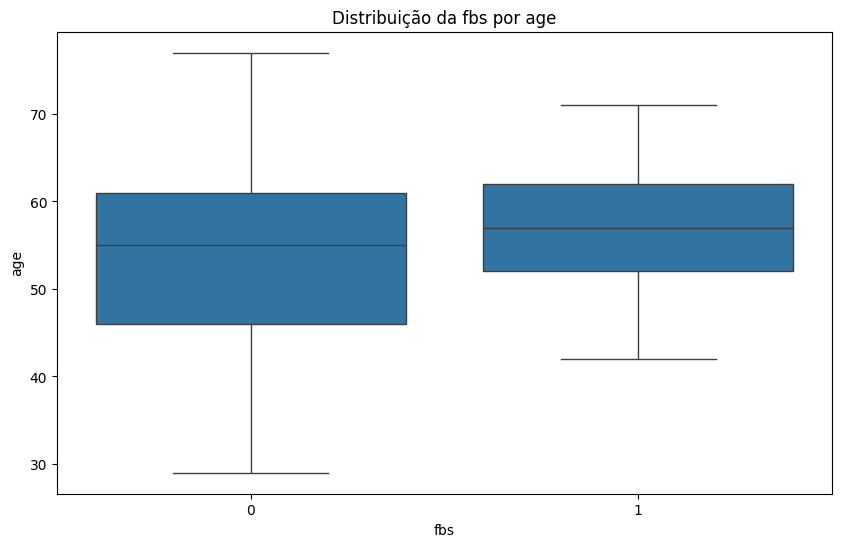

In [604]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fbs', y='age', data=bd)
plt.title('Distribuição da fbs por age')
plt.xlabel('fbs')
plt.ylabel('age')
plt.show()

In [605]:
glicemia = bd.loc[(bd['fbs'] == 1)]

In [606]:
glicemia.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,57.000000,0.733333,1.200000,139.066667,247.911111,1.0,0.422222,149.177778,0.355556,1.055556,1.311111,1.066667,2.266667,0.511111
std,7.061419,0.447214,1.099587,20.163423,51.116099,0.0,0.499495,22.227429,0.484090,1.071650,0.701370,1.156012,0.750757,0.505525
min,42.000000,0.000000,0.000000,101.000000,126.000000,1.0,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,0.000000,0.000000,128.000000,211.000000,1.0,0.000000,137.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,57.000000,1.000000,1.000000,132.000000,245.000000,1.0,0.000000,152.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,62.000000,1.000000,2.000000,150.000000,283.000000,1.0,1.000000,163.000000,1.000000,1.600000,2.000000,2.000000,3.000000,1.000000
max,71.000000,1.000000,3.000000,200.000000,417.000000,1.0,1.000000,194.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


##### Pessoas na faixa ou acima de 40 anos tentem a ter mais problemas com diabetes (pessoas com glicemia em jejum é maior que 120mg/dl), o que prejudica sua saude cardivascular

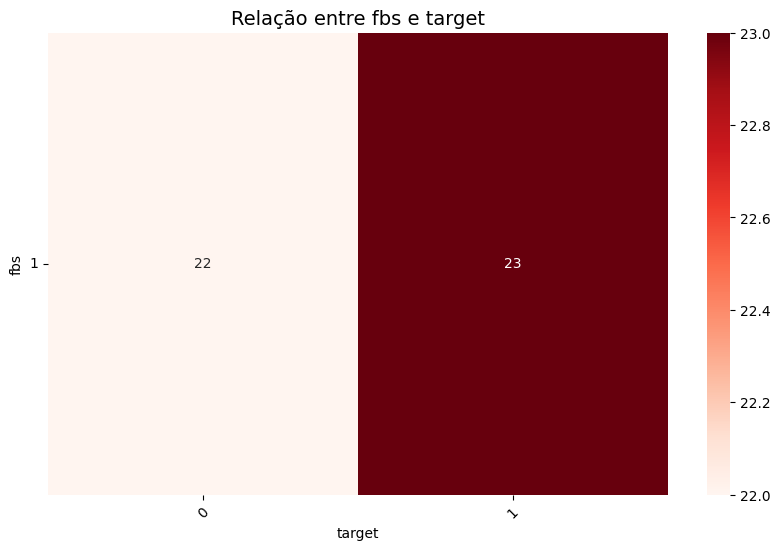

In [607]:
cross_tab = pd.crosstab(glicemia['fbs'], glicemia['target'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Reds', fmt='d')

plt.title('Relação entre fbs e target', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

### De acorco com o pico de exercício, a pessoa tem menos chance de desenvolver problemas cardiovasculares? Se desenvolver, está mais propenso a ser defeito fixo ou reversível?

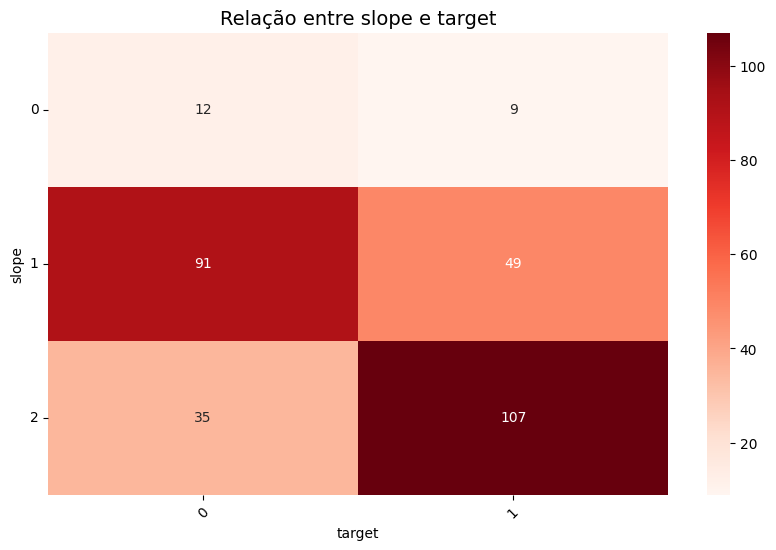

In [608]:
cross_tab = pd.crosstab(bd['slope'], bd['target'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Reds', fmt='d')

plt.title('Relação entre slope e target', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

#### Esse gráfico mostra que pessoa com o pico de exercicio Plano tem menos chance de desenvolver doenças cardiacas

_____________________________________________________________________________________________________________________________________

contagem de pessoas com a cada classe e a media que a pessoa esta com doenças cardiacas

In [609]:
bd.loc[(bd['slope'] == 0)].shape[0]

21

In [610]:
bd[bd['slope'] == 0 ]['target'].mean()

0.42857142857142855

In [611]:
bd[bd['slope'] == 0 ]['target'].median()

0.0

In [612]:
bd.loc[(bd['slope'] == 1)].shape[0]

140

In [613]:
bd[bd['slope'] == 1 ]['target'].mean()

0.35

In [614]:
bd[bd['slope'] == 1 ]['target'].median()

0.0

In [615]:
bd.loc[(bd['slope'] == 2)].shape[0]

142

In [616]:
bd[bd['slope'] == 2 ]['target'].mean()

0.7535211267605634

In [617]:
bd[bd['slope'] == 2 ]['target'].median()

1.0

#### Como não temos informação do que seja o dado 0, convertemos eles para a moda que era a classe 2

In [618]:
doentes = bd[bd['target'] == 1]

In [619]:
doentes.thal.loc[(doentes['thal'] == 0)] = 2

C:\Users\Vitor\AppData\Local\Temp\ipykernel_12928\2875050220.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  doentes.thal.loc[(doentes['thal'] == 0)] = 2
C:\Users\Vitor\AppData\Local\Temp\ipykernel_12928\2875050220.py:1: SettingWithCopyW

In [620]:
doentes[doentes['thal'] == 1].shape[0]

6

In [621]:
doentes[doentes['thal'] == 2].shape[0]

131

In [622]:
doentes[doentes['thal'] == 3].shape[0]

28

In [623]:
doentes[doentes['thal'] == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


#### Pessoas doentes tem mais chances de ter uma Talassemia de defeito fixo (Indica que existe um problema na produção da hemoglobina que não pode ser corrigido.)

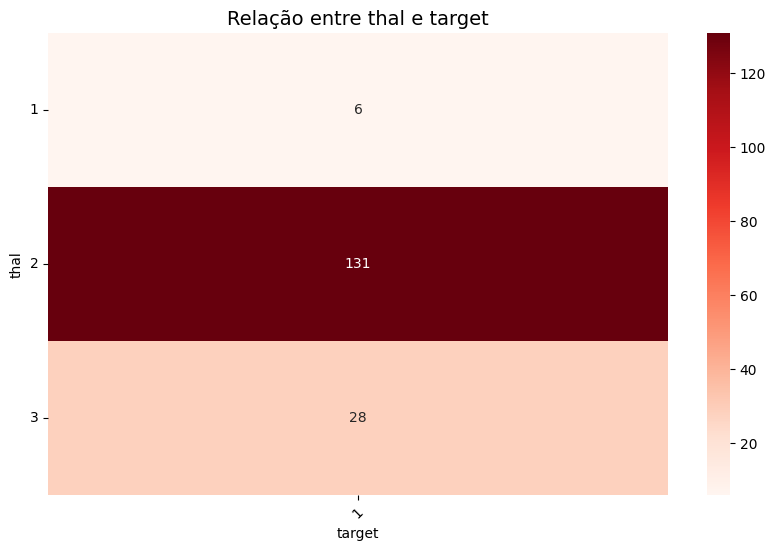

In [624]:
cross_tab = pd.crosstab(doentes['thal'], doentes['target'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Reds', fmt='d')

plt.title('Relação entre thal e target', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [625]:
total = doentes[doentes['thal'] == 1].shape[0] + doentes[doentes['thal'] == 2].shape[0] + doentes[doentes['thal'] == 3].shape[0]

In [626]:
percentual = (doentes[doentes['thal'] == 2].shape[0] * 100) / total

In [627]:
percentual

79.39393939393939

#### com isso podemos concluir que 79.39% das pessoas que possuem um pico de exercicios baixo tendem a desenvolver problemas fixos no coração

_____________________________________________________________________________________________________________________________________

### De acordo com o colesterol, qual a qualidade do hábito alimentar da pessoa? 

In [628]:
bd['Alimenteção'] = bd['chol']

#### criamos uma nova coluna baseada no valor do colesterol para classificar o habito alimentar de cada pessoa, que tambem afeta a saude do coração

In [629]:
bd.Alimenteção.loc[(bd['Alimenteção'] <= 200)].shape[0]

51

In [630]:
bd.Alimenteção.loc[(bd['Alimenteção'] <= 200)] = 0

C:\Users\Vitor\AppData\Local\Temp\ipykernel_12928\2122803351.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  bd.Alimenteção.loc[(bd['Alimenteção'] <= 200)] = 0
C:\Users\Vitor\AppData\Local\Temp\ipykernel_12928\2122803351.py:1: SettingWit

In [631]:
bd.loc[(bd['Alimenteção'] > 200) & (bd['Alimenteção'] <= 240), 'Alimenteção'] = 1

In [632]:
bd.loc[(bd['Alimenteção'] > 240) & (bd['Alimenteção'] <= 300), 'Alimenteção'] = 2

In [633]:
bd.loc[(bd['Alimenteção'] > 300), 'Alimenteção'] = 3

In [634]:
bd['Alimenteção'].unique()

array([1, 2, 3, 0], dtype=int64)

In [635]:
bd.Alimenteção = bd['Alimenteção'].map({0: 'Ideal', 1: 'Moderado' , 2:'Alto' , 3:'Muito Alto'})

In [636]:
bd['Alimenteção'].unique()

array(['Moderado', 'Alto', 'Muito Alto', 'Ideal'], dtype=object)

In [640]:
bd[['chol' , 'Alimenteção']]

,chol,Alimenteção
0,233,Moderado
1,250,Alto
2,204,Moderado
3,236,Moderado
4,354,Muito Alto
...,...,...
298,241,Alto
299,264,Alto
300,193,Ideal
301,131,Ideal


#### classificamos como:

    Nível ideal: menos de 200 mg/dL. 

    Moderado: 200 a 240 mg/dL. 

    Alto: 240 a 300 mg/dL. 
    
    Muito alto, acima de 300 mg/dL.